   Описание проекта
   
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Цель проекта

Определить покупателей с высоким риском снижения покупательской активности и сформировать предложение заказчику о том, как можно улучшить ситуацию.

Описание данных

Данные для работы находятся в нескольких таблицах.

market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

In [1]:
# !python3.11 -m venv myenv

In [2]:
!pip install matplotlib==3.5.0

ERROR: Could not find a version that satisfies the requirement matplotlib==3.5.4 (from versions: 0.86, 0.86.1, 0.86.2, 0.91.0, 0.91.1, 1.0.1, 1.1.0, 1.1.1, 1.2.0, 1.2.1, 1.3.0, 1.3.1, 1.4.0, 1.4.1rc1, 1.4.1, 1.4.2, 1.4.3, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0b1, 2.0.0b2, 2.0.0b3, 2.0.0b4, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.1.0rc1, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc1, 2.2.0, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 3.0.0rc2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.1.0rc1, 3.1.0rc2, 3.1.0, 3.1.1, 3.1.2, 3.1.3, 3.2.0rc1, 3.2.0rc3, 3.2.0, 3.2.1, 3.2.2, 3.3.0rc1, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.3.4, 3.4.0rc1, 3.4.0rc2, 3.4.0rc3, 3.4.0, 3.4.1, 3.4.2, 3.4.3, 3.5.0b1, 3.5.0rc1, 3.5.0, 3.5.1, 3.5.2, 3.5.3, 3.6.0rc1, 3.6.0rc2, 3.6.0, 3.6.1, 3.6.2, 3.6.3, 3.7.0rc1, 3.7.0, 3.7.1, 3.7.2, 3.7.3, 3.7.4, 3.7.5, 3.8.0rc1, 3.8.0, 3.8.1, 3.8.2, 3.8.3, 3.8.4, 3.9.0rc2, 3.9.0)
ERROR: No matching distribution found for matplotlib==3.5.4


In [3]:
!pip show matplotlib

Name: matplotlib
Version: 3.3.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /opt/conda/lib/python3.9/site-packages
Requires: pyparsing, pillow, cycler, kiwisolver, python-dateutil, numpy
Required-by: seaborn, pyod, catboost


In [4]:
!pip install phik

     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01


In [5]:
!pip install shap

     |████████████████████████████████| 540 kB 2.3 MB/s eta 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import sklearn 


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score
import phik
import shap
from phik import phik_matrix
from shap import LinearExplainer

In [1]:
# !pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

# Импортирую все зависимости

In [8]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Шаг. Загрузка данных

#### Чтение файлов.

In [9]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_file.name = 'market_file'
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.name = 'market_money'
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.name = 'market_time'
money_df = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")
money_df.name = 'money_df'

In [10]:
def describe_df(df):

    binary_feats = [col for col in df.columns if df[col].nunique() <= 2]
    categorical_feats = [col for col in df.columns if df[col].dtype == 'object' and col not in binary_feats]
    continuous_feats = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_feats]

    print('DataFrame Name:', df.name, '\n')
    print('Binary Features:', binary_feats)
    print('Categorical Features:', categorical_feats)
    print('Continuous Features:', continuous_feats, '\n')

    print('Number of features:', df.shape[1])
    print('Number of rows:', df.shape[0], '\n')
    
    print('Missing Data:\n')
    print(df.isna().sum(),'\n')
    print('Duplicates:', df.duplicated().sum(),'\n')
    print(f'\nData Types: \n{df.dtypes}')

    print('Summary:\n')
    display(df.describe())
    print()

    print('Dataframe Head\n')
    display(df.head())
    print()
    print('Dataframe Tail\n')
    display(df.tail())

In [11]:
describe_df(market_file)

DataFrame Name: market_file 

Binary Features: ['Покупательская активность', 'Разрешить сообщать']
Categorical Features: ['Тип сервиса', 'Популярная_категория']
Continuous Features: ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит'] 

Number of features: 13
Number of rows: 1300 

Missing Data:

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64 

Du

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000



Dataframe Head



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



Dataframe Tail



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7
1299,216647,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12


In [12]:
describe_df(market_money)

DataFrame Name: market_money 

Binary Features: []
Categorical Features: ['Период']
Continuous Features: ['id', 'Выручка'] 

Number of features: 3
Number of rows: 3900 

Missing Data:

id         0
Период     0
Выручка    0
dtype: int64 

Duplicates: 0 


Data Types: 
id           int64
Период      object
Выручка    float64
dtype: object
Summary:



,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000



Dataframe Head



,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



Dataframe Tail



,id,Период,Выручка
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0
3899,216647,текущий_месяц,4448.3


In [13]:
describe_df(market_time)

DataFrame Name: market_time 

Binary Features: ['Период']
Categorical Features: []
Continuous Features: ['id', 'минут'] 

Number of features: 3
Number of rows: 2600 

Missing Data:

id        0
Период    0
минут     0
dtype: int64 

Duplicates: 0 


Data Types: 
id         int64
Период    object
минут      int64
dtype: object
Summary:



,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000



Dataframe Head



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



Dataframe Tail



,id,Период,минут
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10
2599,216647,предыдцщий_месяц,15


In [14]:
describe_df(money_df)

DataFrame Name: money_df 

Binary Features: []
Categorical Features: []
Continuous Features: ['id', 'Прибыль'] 

Number of features: 2
Number of rows: 1300 

Missing Data:

id         0
Прибыль    0
dtype: int64 

Duplicates: 0 


Data Types: 
id           int64
Прибыль    float64
dtype: object
Summary:



,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000



Dataframe Head



,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21



Dataframe Tail



,id,Прибыль
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03
1299,216647,3.28


Вывод по общей информации о данных:
- market_file

Замечаний по наличию данных нет, все признаки соответствуют описанию. Заметны проблемы в самих данных - их разберу в следующем разделе.

- market_money 

Замечаний по наличию данных нет, все признаки соответствуют описанию.

- market_time

Замечаний по наличию данных нет, все признаки соответствуют описанию.

- money_df

Замечаний по наличию данных нет, все признаки соответствуют описанию. Заметны проблемы в самих данных - их разберу в следующем разделе.

### Предобработка данных

#### Market_file

In [15]:
#приведу все названия столбцов к нижнему регистру и избавлюсь от пробелом 
market_file.columns = market_file.columns.str.lower().str.replace(' ', '_')
market_file.head(2)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [16]:
#проверю на дубликаты, так как уникальных пользователей в датафрейме должно быть не больше 1
print(f'Дубликатов среди пользователей в датафрейме market_data: {market_file["id"].duplicated().sum()}')

Дубликатов среди пользователей в датафрейме market_data: 0


In [17]:
#проверю все уникальные строковых столбцов
col_names = market_file.select_dtypes(exclude='number').columns.tolist()
    
print(f'Уникальные значения признака "покупательская_активность": {market_file["покупательская_активность"].unique()}')
print(f'Уникальные значения признака "тип_сервиса": {market_file["тип_сервиса"].unique()}')
print(f'Уникальные значения признака "разрешить_сообщать": {market_file["разрешить_сообщать"].unique()}')
print(f'Уникальные значения признака "популярная_категория": {market_file["популярная_категория"].unique()}')

Уникальные значения признака "покупательская_активность": ['Снизилась' 'Прежний уровень']
Уникальные значения признака "тип_сервиса": ['премиум' 'стандартт' 'стандарт']
Уникальные значения признака "разрешить_сообщать": ['да' 'нет']
Уникальные значения признака "популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [18]:
#можно заменить, что значение "Тип сервиса" встречаются 2 однотипных значения. Заменю его
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
print(f'Уникальные значения признака "тип_сервиса" после замены: {market_file["тип_сервиса"].unique()}')

Уникальные значения признака "тип_сервиса" после замены: ['премиум' 'стандарт']


In [19]:
#сделаю итоговую проверку этого датафрейма на дубликаты 
print(f'Дубликаты в датафрейме market_data: {market_file.duplicated().sum()}')

Дубликаты в датафрейме market_data: 0


Вывод по market_file:
    
По пропускам, дубликатам и типам данных к датафрейму market_file больше нет.

#### Market_money

In [20]:
market_money.columns = market_money.columns.str.lower().str.replace(' ', '_')
market_money.head(2)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1


In [21]:
#по аналогии с предыдущим, сделаю предобработку следующих датафреймов
print(f"Уникальные значения признака 'период': {market_money['период'].unique()}")
market_money['период'].value_counts()

Уникальные значения признака 'период': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


текущий_месяц          1300
предыдущий_месяц       1300
препредыдущий_месяц    1300
Name: период, dtype: int64

In [22]:
market_money['id'].value_counts().max()

3

Вывод по market_money:

Ошибок и замечаний нет. Каждый пользователь рассматривался в течение трех месяцев. 

#### Market_time

In [23]:
market_time.columns = market_time.columns.str.lower().str.replace(' ', '_')
market_time.head(2)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13


In [24]:
print(f'Уникальные значения признака "период": {market_time["период"].unique()}')
market_time['период'].value_counts()

Уникальные значения признака "период": ['текущий_месяц' 'предыдцщий_месяц']


предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

In [25]:
#ошибка в слове предыдущий, исправлю ее
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
print(f'Уникальные значения признака "период": {market_time["период"].unique()}')

Уникальные значения признака "период": ['текущий_месяц' 'предыдущий_месяц']


In [26]:
market_time['id'].value_counts().max()

2

#### Money_df

In [27]:
money_df.columns = money_df.columns.str.lower().str.replace(' ', '_')
money_df.head(2)

,id,прибыль
0,215348,0.98
1,215349,4.16


In [28]:
money_df['прибыль'] = money_df['прибыль'].replace(to_replace=',', value='.', regex=True)
money_df['прибыль'] = money_df['прибыль'].astype('float')

print(f'Дубликатов среди пользователей в датафрейме money_data: {money_df["id"].duplicated().sum()}')

Дубликатов среди пользователей в датафрейме money_data: 0


Вывод по money_df:
    
Замечаний к данным датафрейма нет.

            Общий вывод по предобработке данных:


- в столбце 'Тип сервиса' были обнаружены и устранены неявные дубликаты;
- тип данных столбца 'Прибыль' датафрейма money_data был изменен на float;
- все датафреймы были проверены на наличие пропусков, явных и неявных дубликатов;
- после небольших корректировок замечаний к данным всех датафреймов нет.

### Исследовательский анализ данных

- Изучу статистики всех таблиц и выбросы с помощью диаграммы "ящик с усами".
- Отберу клиентов с покупательской активностью не менее трёх месяцев

In [29]:
def plot_histograms_boxplots(df):
    #исключаю колонку 'id'
    columns = [col for col in df.columns if col != 'id']
    
    #проверяю, есть ли числовые колонки для ящиков с усами для категориальных данных
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    if not numeric_cols:
        raise ValueError("Не найдено числовых колонок для построения ящиков с усами для категориальных данных.")
    numeric_col_for_boxplot = numeric_cols[0]
    
    for col in columns:
        plt.figure(figsize=(8, 6))

        if pd.api.types.is_numeric_dtype(df[col]):
            # Построение гистограммы для числовых данных
            sns.histplot(df[col], kde=True)
            plt.title(f'Гистограмма для {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.show()

            # Построение ящика с усами для числовых данных
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[col])
            plt.title(f'Ящик с усами для {col}')
            plt.xlabel(col)
            plt.show()
        else:
            # Построение барплота для категориальных данных
            sns.countplot(x=df[col])
            plt.title(f'Распределение для {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.show()

            # Построение ящика с усами для категориальных данных
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[col], y=df[numeric_col_for_boxplot])
            plt.title(f'Ящик с усами для {col}')
            plt.xlabel(col)
            plt.ylabel(numeric_col_for_boxplot)
            plt.show()

def plot_countplots(df):
    #исключаю колонку 'id'
    columns = [col for col in df.columns if col != 'id']
    
    for col in columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(8, 6))
            sns.countplot(x=df[col])
            plt.title(f'Распределение для {col}')
            plt.xlabel(col)
            plt.ylabel('Частота')
            plt.show()


#### Market_file

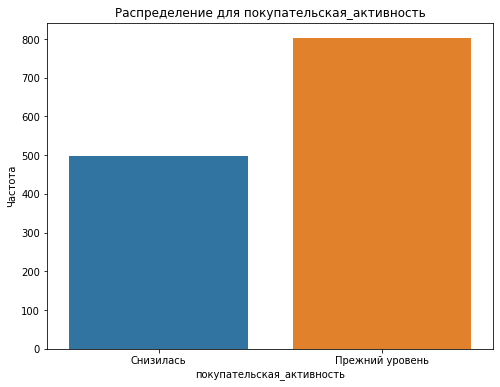

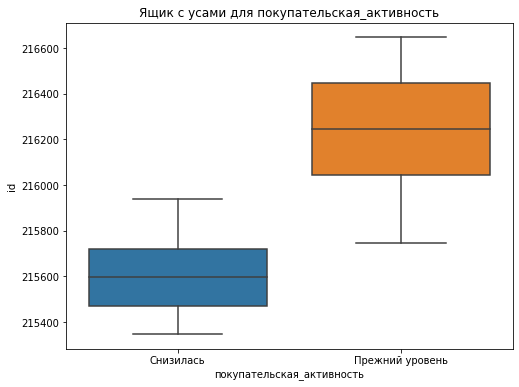

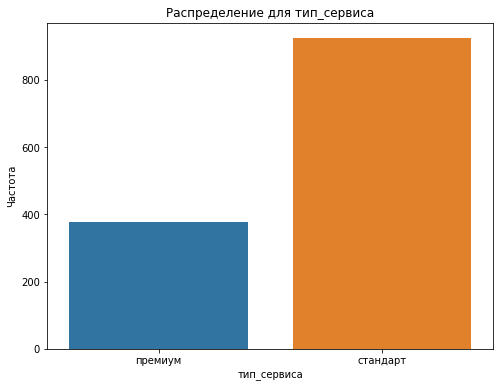

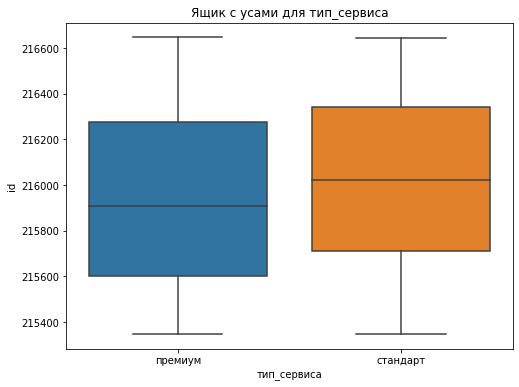

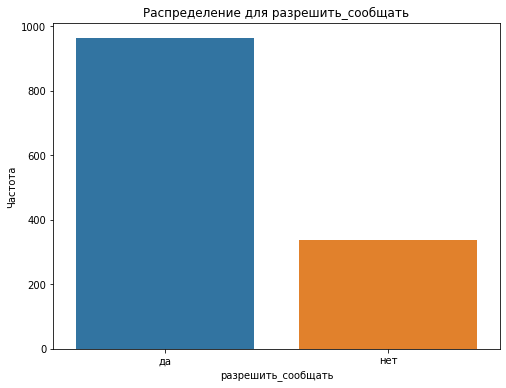

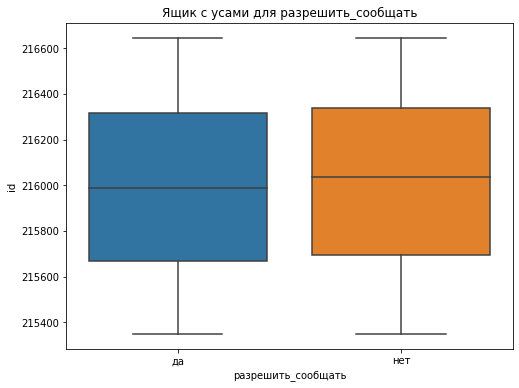

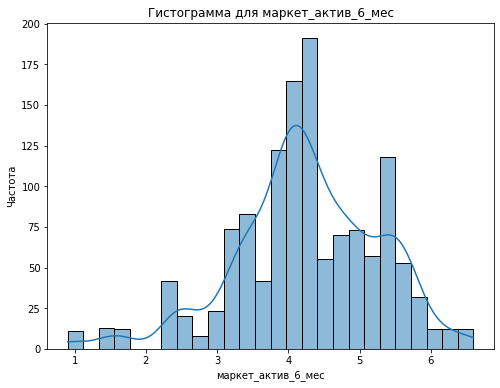

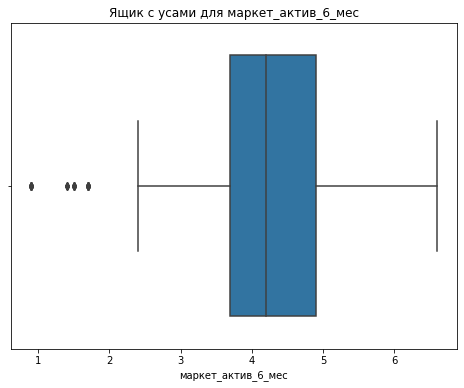

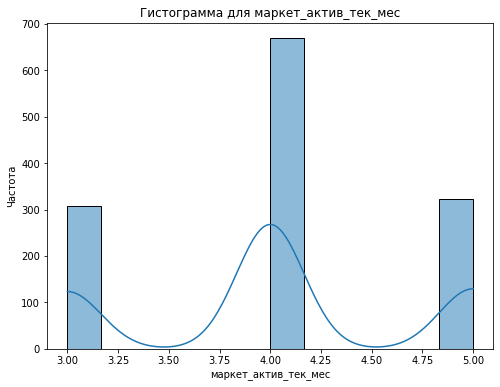

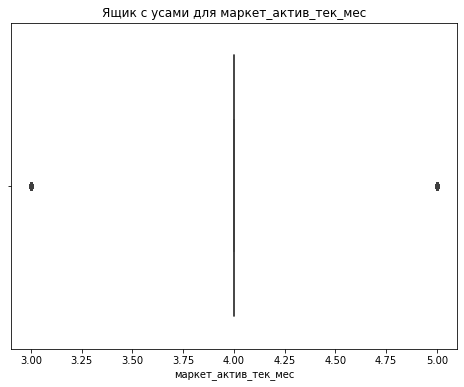

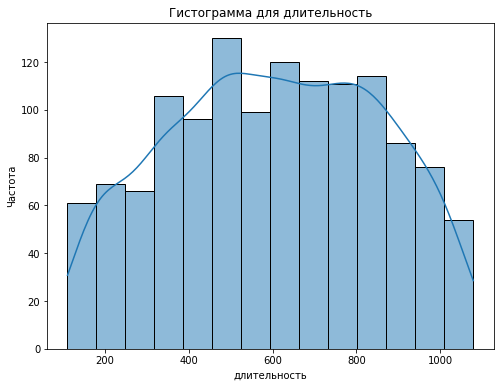

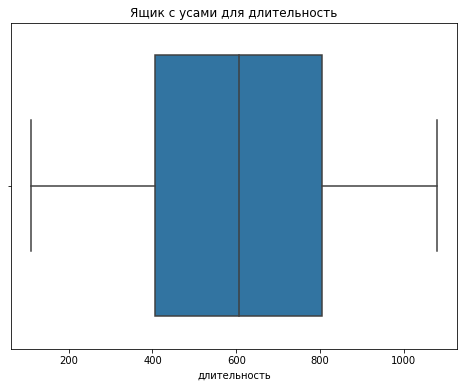

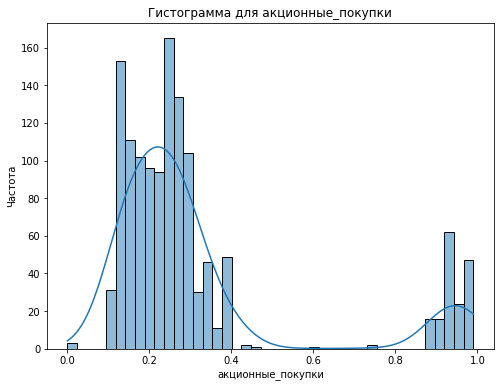

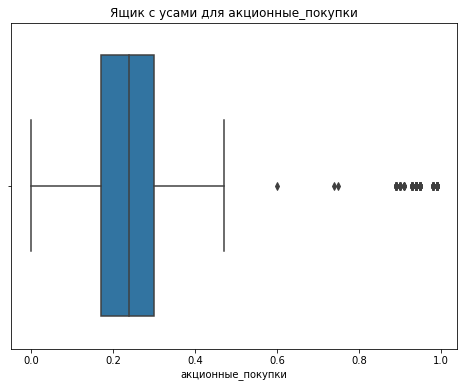

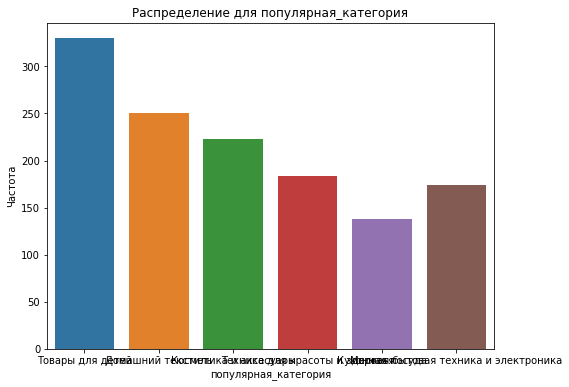

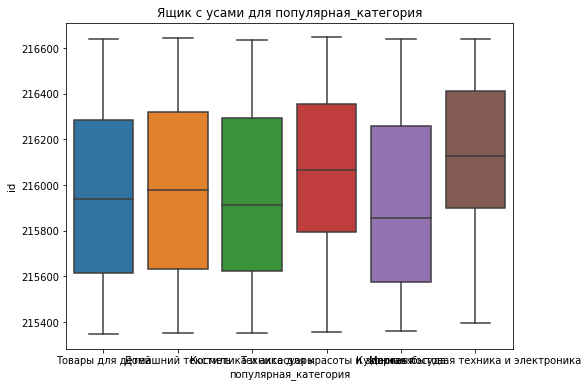

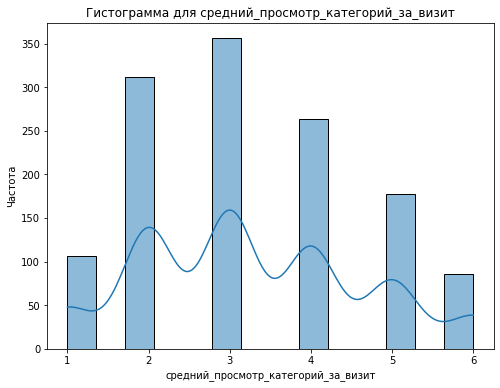

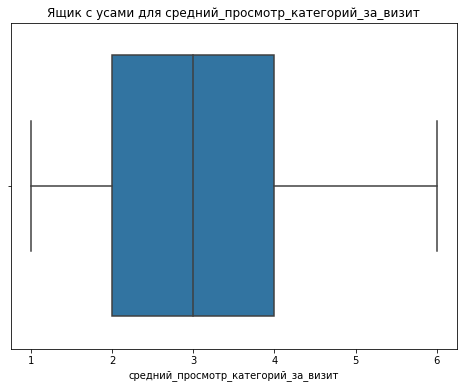

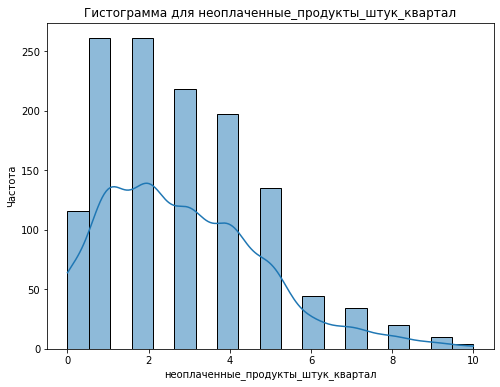

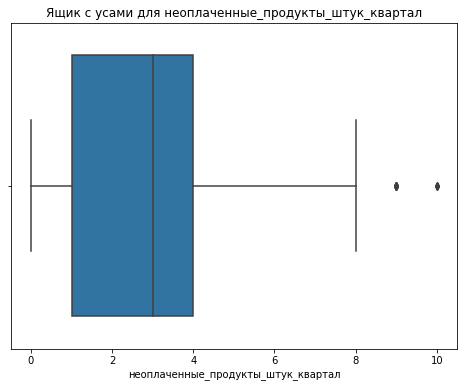

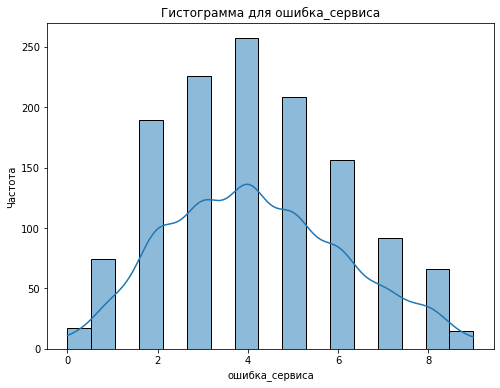

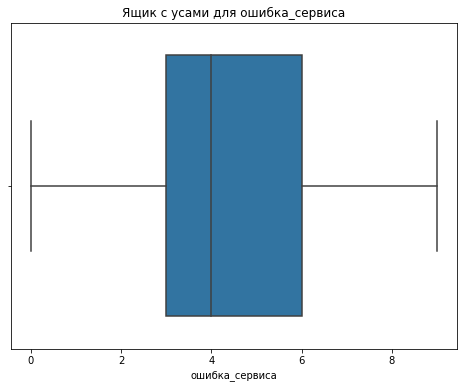

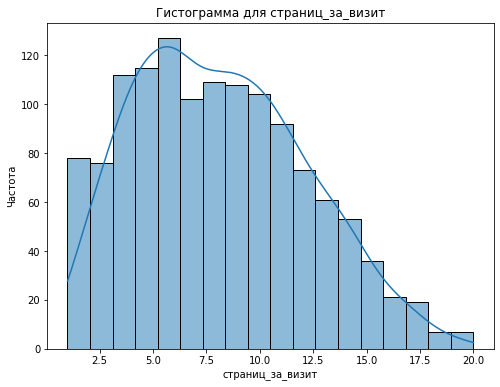

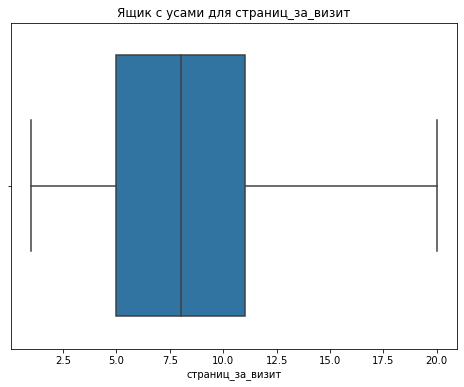

In [30]:
#построю гистограммы и ящики с усами
plot_histograms_boxplots(market_file)

In [31]:
#диаграмма market_file выглядит так, потому что всего 3 уникальных значения
market_file ['маркет_актив_тек_мес'].unique()

array([5, 4, 3])

In [32]:
#Также можно заметить выбросы в знаечниях Маркет_актив_6_мес, Акционные_покупки, Неоплаченные_продукты_штук_квартал
#проверю их долю
print(f'Доля выбросов в маркет_актив_6_мес составляет: {round(len(market_file .query("маркет_актив_6_мес < 3.25 | маркет_актив_6_мес > 4.75")) / len(market_file) * 100, 3)}%')


Доля выбросов в маркет_актив_6_мес составляет: 42.923%


Данные вполне адекватные, поэтому удалять или заменять медианным значением не буду, оставлю как есть

In [33]:
print(f'Доля выбросов в акционные_покупки составляет: {round(len(market_file .query("акционные_покупки > 0.7")) / len(market_file) * 100, 3)}%')


Доля выбросов в акционные_покупки составляет: 12.846%


также, доля выбрасов оказалось не маленькой, поэтому удалять или заменять медианным значением не буду, оставлю как есть

In [34]:
print(f'Доля выбросов в неоплаченные_продукты_штук_квартал составляет: {round(len(market_file .query("неоплаченные_продукты_штук_квартал > 8")) / len(market_file) * 100, 3)}%')

Доля выбросов в неоплаченные_продукты_штук_квартал составляет: 1.077%


Выбросав мало, они не будут влиять на данные, поэтому можно их оставить 

In [35]:
#можно заметить выбросы, избавлюсь от них
market_file.sort_values(by='неоплаченные_продукты_штук_квартал', ascending=False).head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
176,215524,Снизилась,стандарт,да,3.0,3,474,0.23,Техника для красоты и здоровья,1,10,4,2
216,215564,Снизилась,стандарт,нет,3.9,3,618,0.24,Техника для красоты и здоровья,2,10,3,5
73,215421,Снизилась,премиум,нет,4.0,5,523,0.94,Техника для красоты и здоровья,1,10,7,5
118,215466,Снизилась,премиум,нет,2.4,5,523,0.30,Техника для красоты и здоровья,1,10,1,4
320,215668,Снизилась,премиум,да,4.4,4,343,0.94,Товары для детей,2,9,2,2


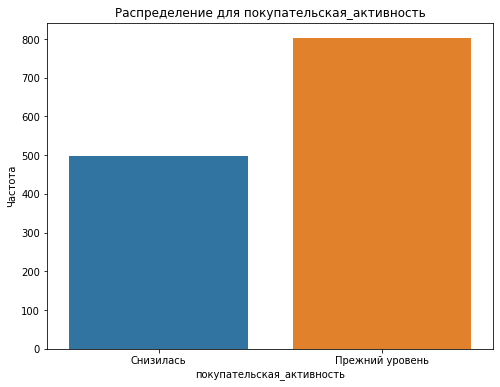

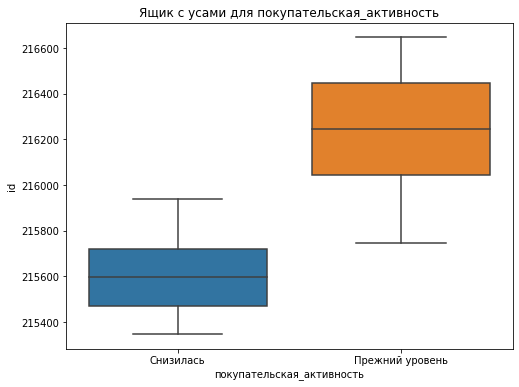

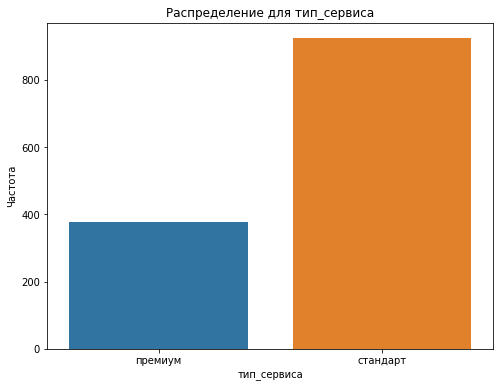

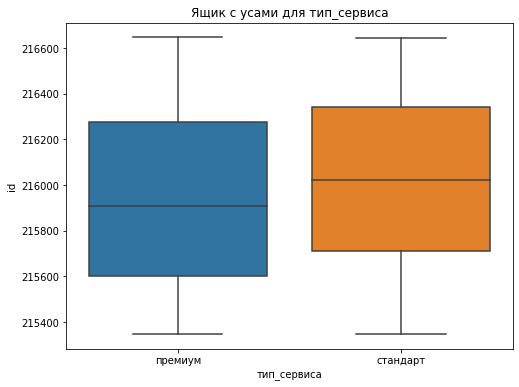

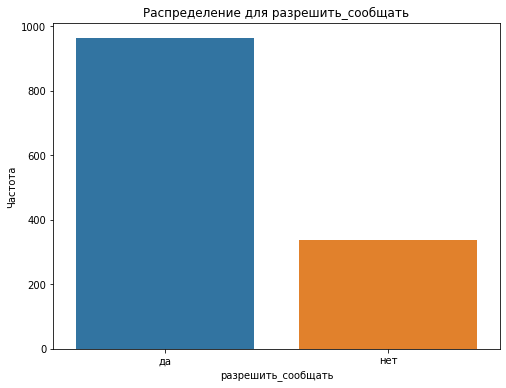

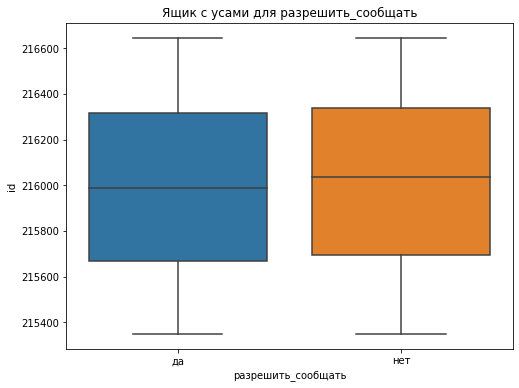

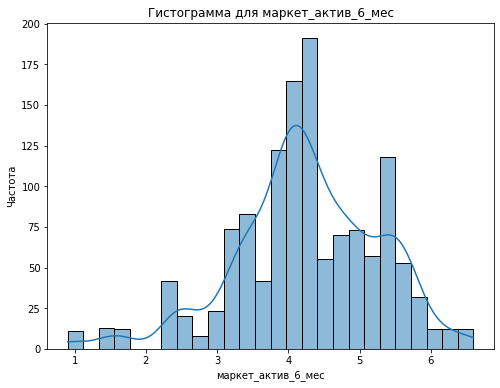

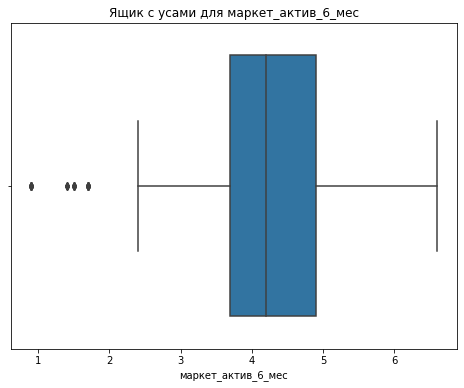

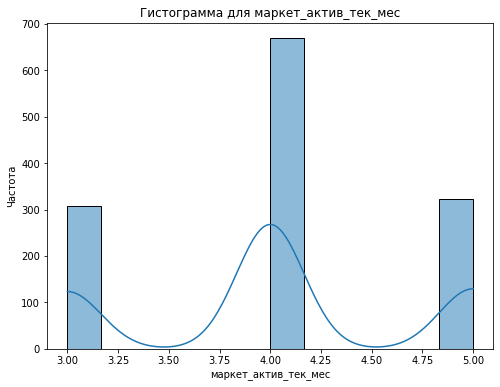

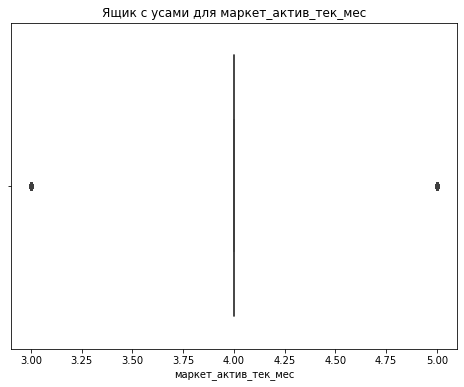

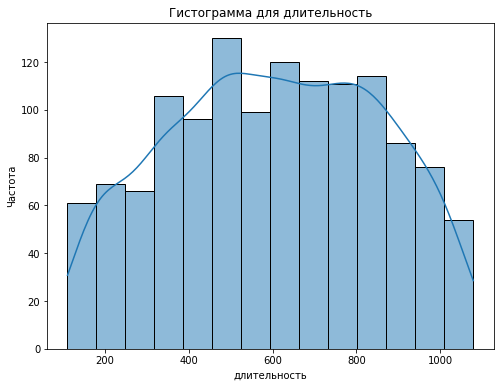

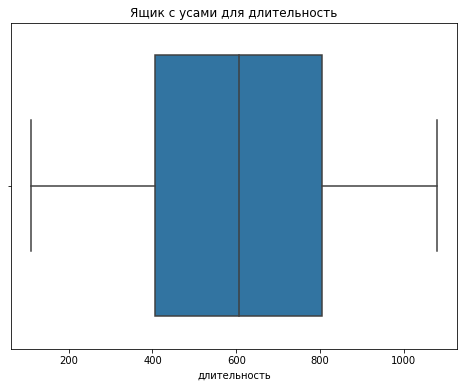

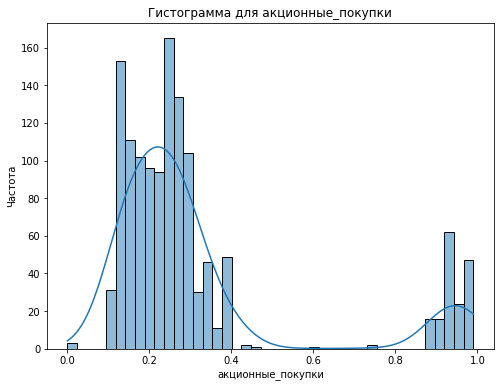

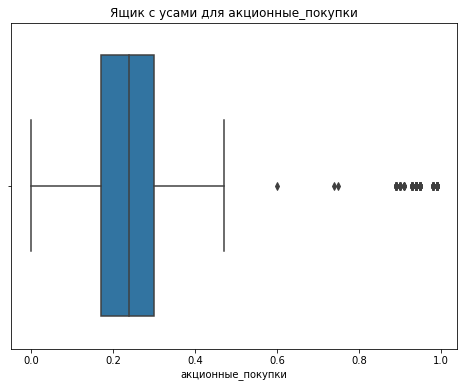

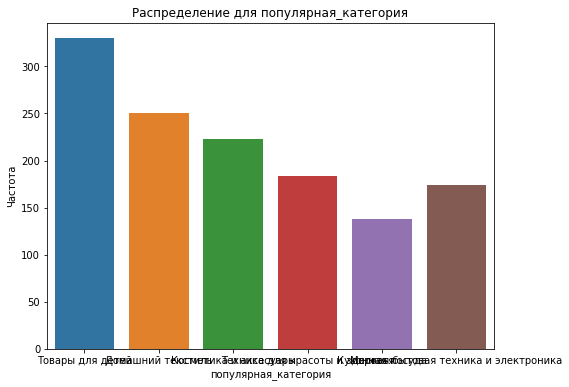

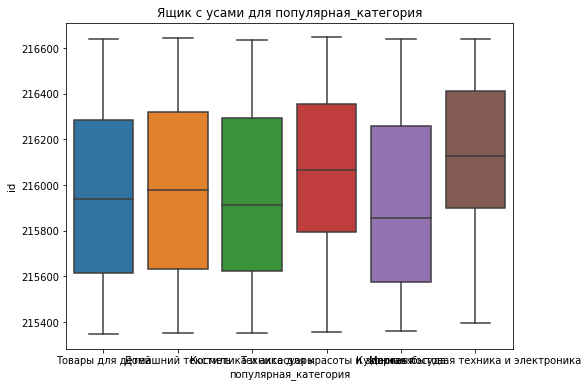

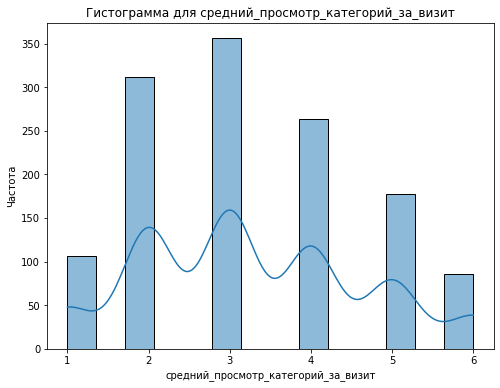

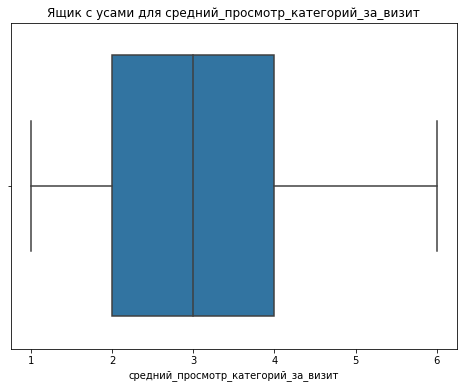

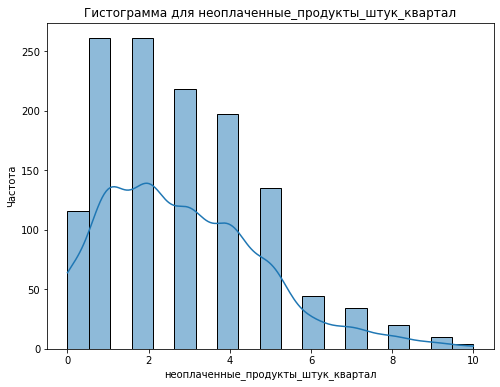

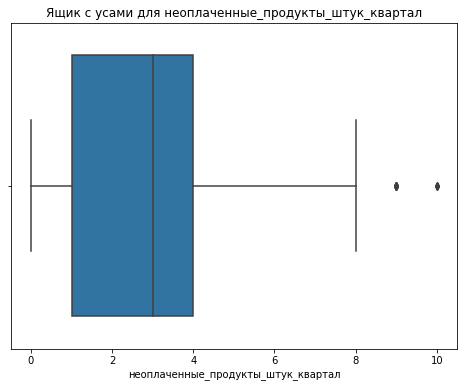

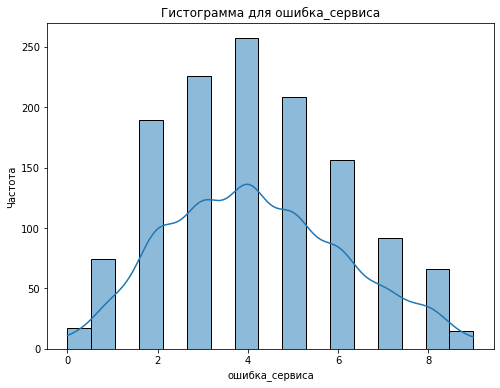

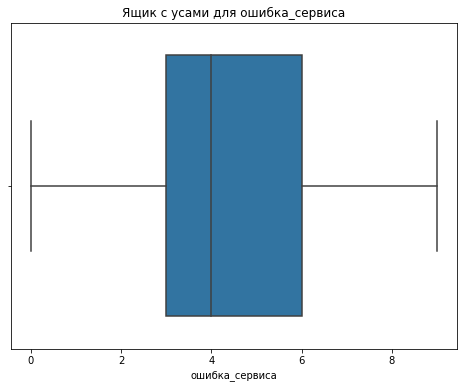

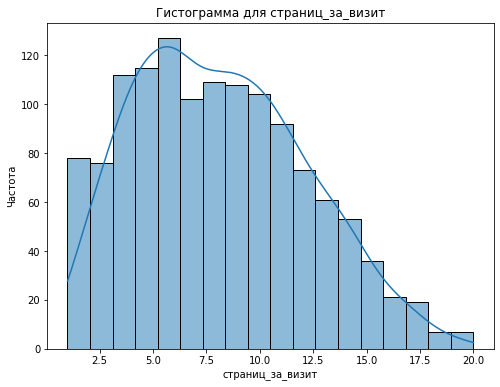

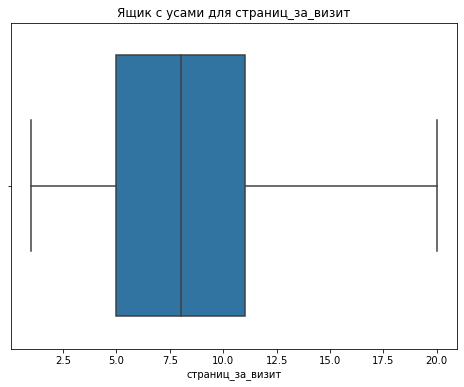

In [36]:
#строю новую гистограмму и ящик с усами
# market_file = market_file[market_file['Неоплаченные_продукты_штук_квартал'] != 7]
plot_histograms_boxplots(market_file)

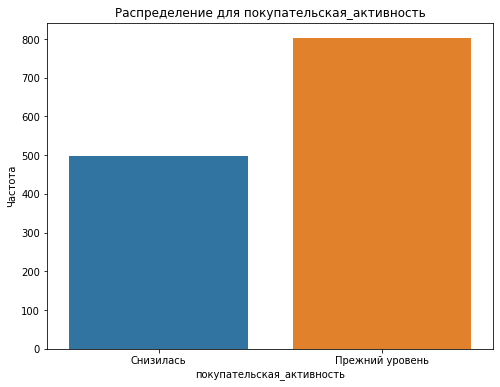

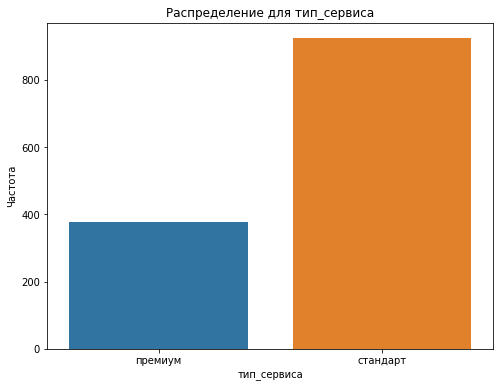

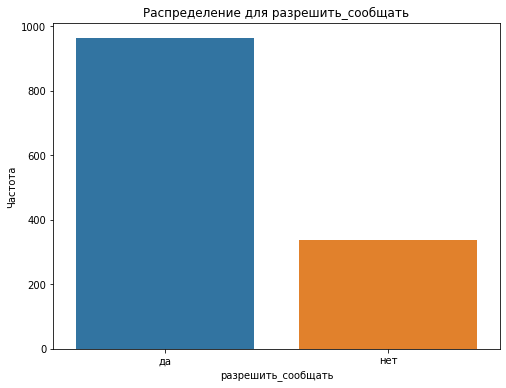

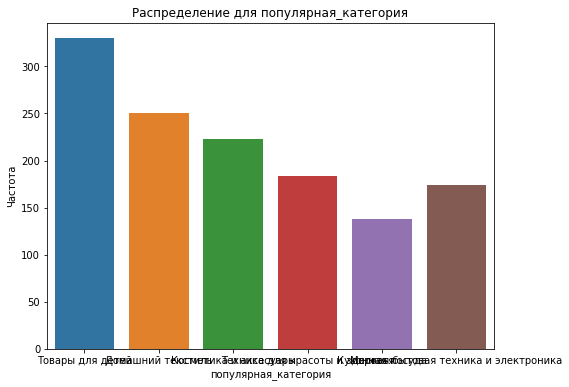

In [37]:
#и ещё посмотрю на распределение
plot_countplots(market_file)

в значениях Тип_сервиса и Разрешить_сообщать есть дисбаланс в значениях. Тажке он наблюдается и в целевом признаке Покупательская_активность.

#### Market_money

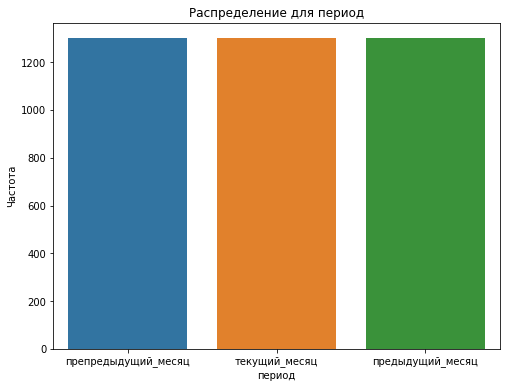

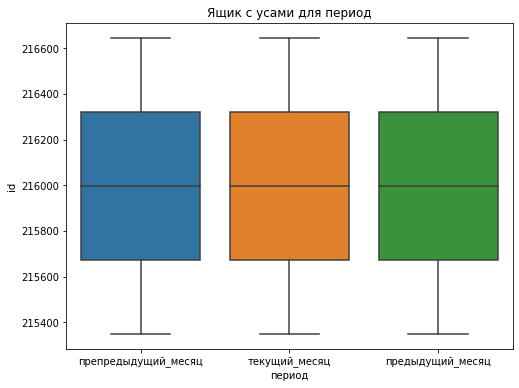

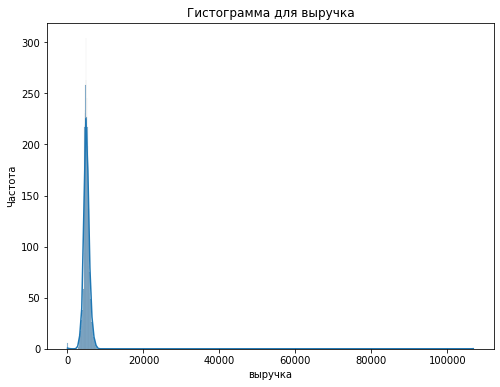

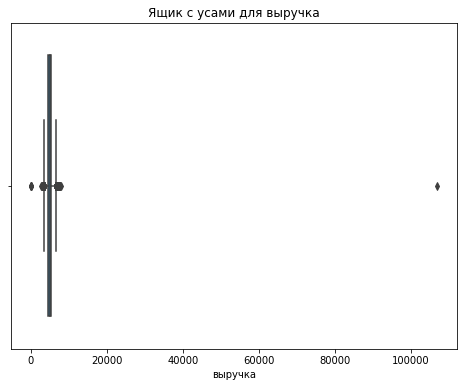

In [38]:
#построю гистограммы и ящики с усами
plot_histograms_boxplots(market_money)

In [39]:
#можно заметить выбросы, избавлюсь от них
market_money.sort_values(by='выручка', ascending=False).head()

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8


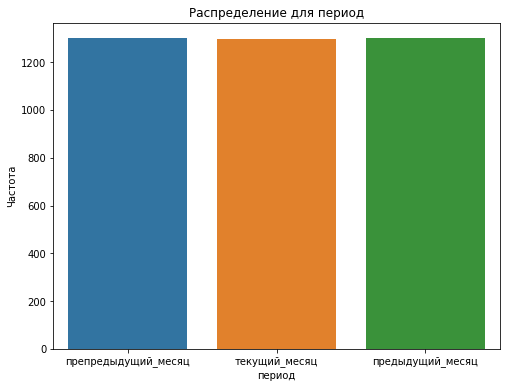

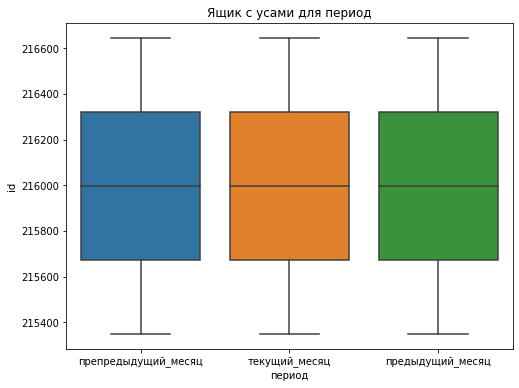

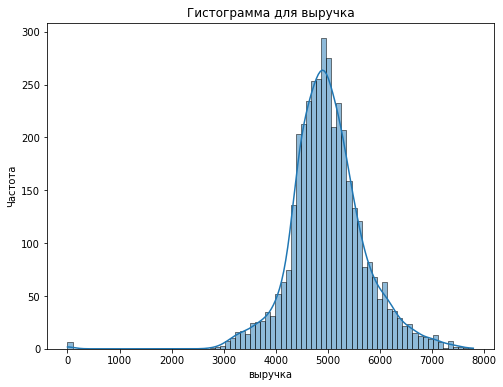

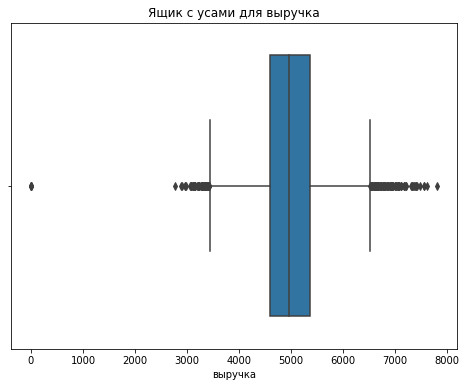

In [40]:
#строю новую гистограмму и ящик с усами
market_money = market_money[market_money['выручка'] != 106862.2]
plot_histograms_boxplots(market_money)

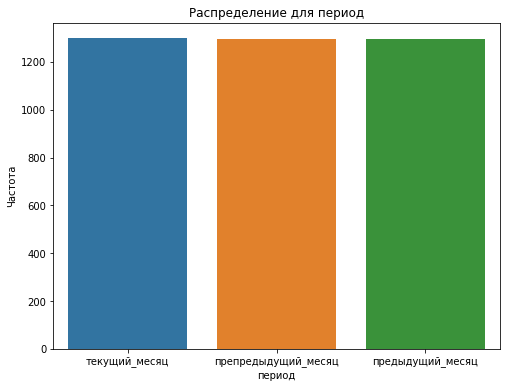

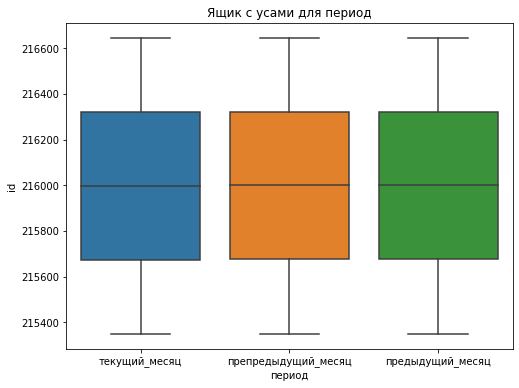

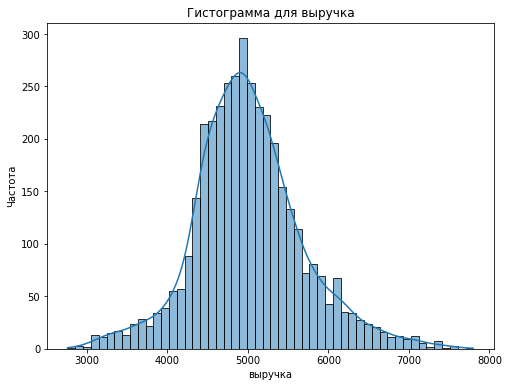

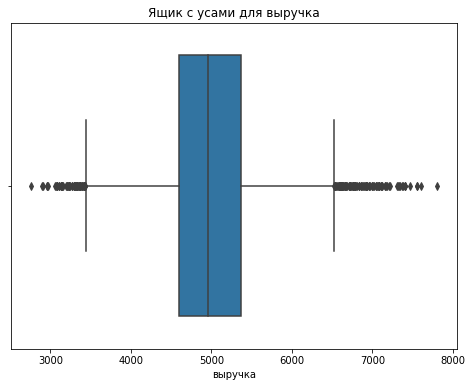

In [41]:
#также на выброс похож 0, его тоже можно удалить
market_money = market_money[market_money['выручка'] != 0]
plot_histograms_boxplots(market_money)

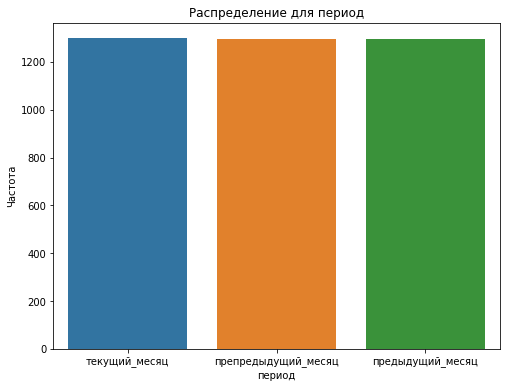

In [42]:
plot_countplots(market_money)

данные выглядят нормально

#### Market_time

In [43]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


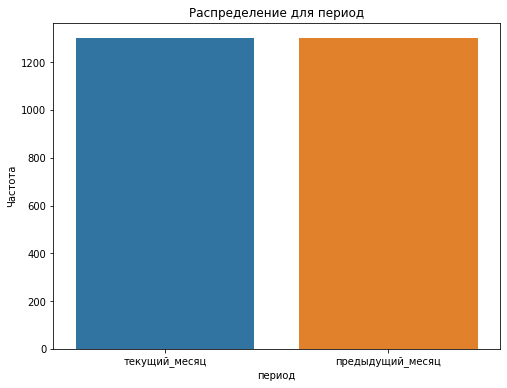

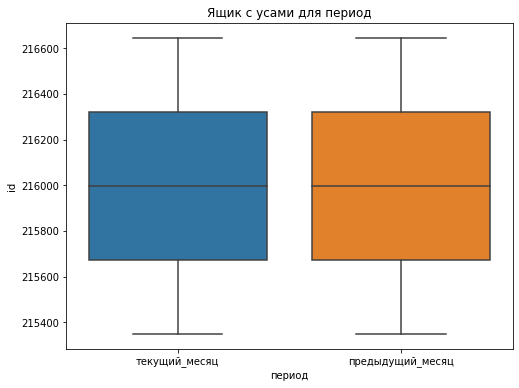

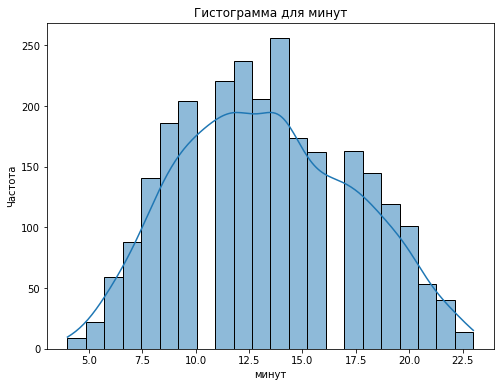

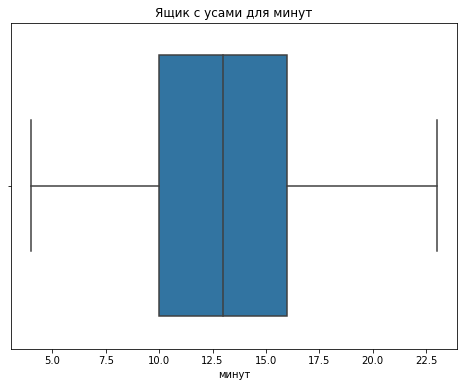

In [44]:
plot_histograms_boxplots(market_time)

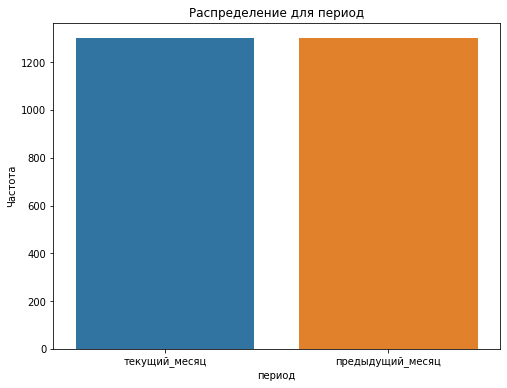

In [45]:
plot_countplots(market_time)

с данными всё хорошо

#### Money_df

In [46]:
money_df.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


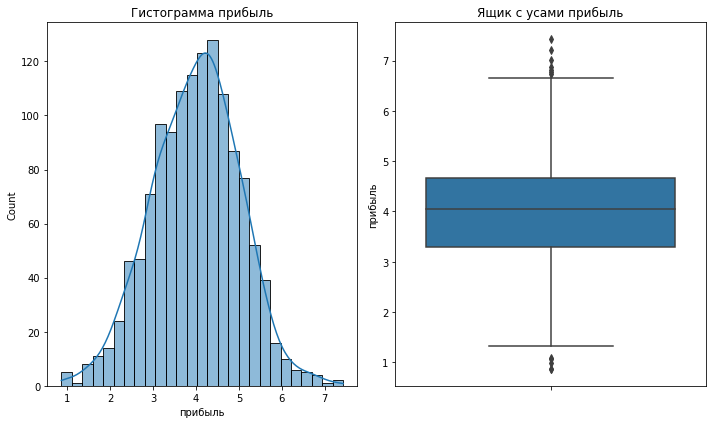

In [47]:
def plot_histograms_boxplots(series):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(series, kde=True)
    plt.title('Гистограмма прибыль')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=series)
    plt.title('Ящик с усами прибыль')

    plt.tight_layout()
    plt.show()

plot_histograms_boxplots(money_df['прибыль'])

In [48]:
market_money.columns.values.tolist()

['id', 'период', 'выручка']

In [49]:
agg_dict = {'период': ['count']}
grouped = market_money.groupby('id').agg(agg_dict)
grouped.columns = ['count']

grouped = grouped[grouped['count'] == 3]
market_file = market_file[market_file['id'].isin(grouped.index)]
len(market_file)

1296

Были исключенны всего 4 записи

Выбросов не очень много, поэтому может игноривать их. 
Чтобы отобрать пользователей с покупательской активностью не менее трёх месяцев можно просто взять пользователей из таблицы Money_df, так как она хранит данные о среднемесячной прибыли покупателя за последние 3 месяца.В таблице нет значений равные 0 следовательно все пользователи совершали покупки в течении 3 месяцев.


### Объединение таблиц

- 4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся.
- 4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [50]:
#перед тем как объядинять таблицы, объединю данные в столблеце Период
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped['id'] = market_money_grouped.index

market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped['id'] = market_time_grouped.index
#объединю таблицы
df_full = market_file.join(market_money_grouped, on='id', lsuffix="_left", rsuffix="_выручка")
df_full = df_full.rename(columns={'id_left':'id'})
df_full = df_full.join(market_time_grouped, on='id', lsuffix="_left", rsuffix="_минут")
df_full = df_full.rename(columns={'id_left':'id'})
df_full = df_full.drop(['id_выручка', 'id_минут'], axis=1)
df_full.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [51]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

Таблицы объединены. Типы в норме и нет NaN

In [52]:
df_full.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

### Корреляционный анализ

Проведу корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


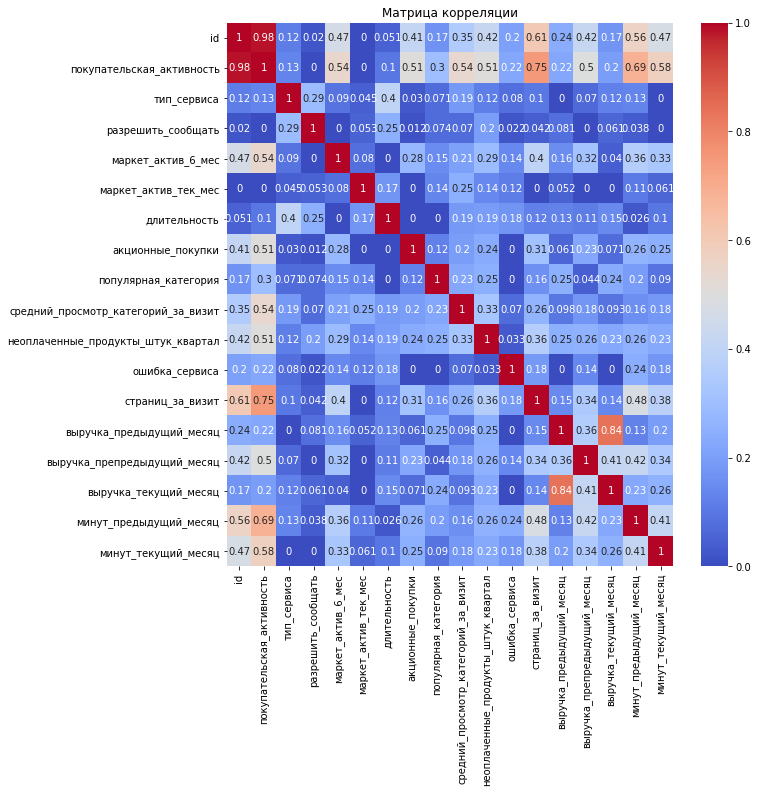

In [53]:
corr_matrix =df_full.phik_matrix()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [54]:
#также построю матрицу корреляции для целевого признака:
def build_phik_corr_matrix(df, col):
    ax_col = 0
    ax_row = 0
    
    fig, axs = plt.subplots(ncols=1, nrows=df[col].nunique(), figsize=(20,20))
    for i in df[col].unique():
        df_i = df[df[col] == i]
        sns.heatmap(df_i.phik_matrix(), annot=True, cmap='cividis', ax=axs[ax_col])
        axs[ax_col].set_title(i)
        ax_col+=1
        if ax_col > 1:
            ax_col=0
            ax_row+=1  
    fig.tight_layout()
    plt.show()

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


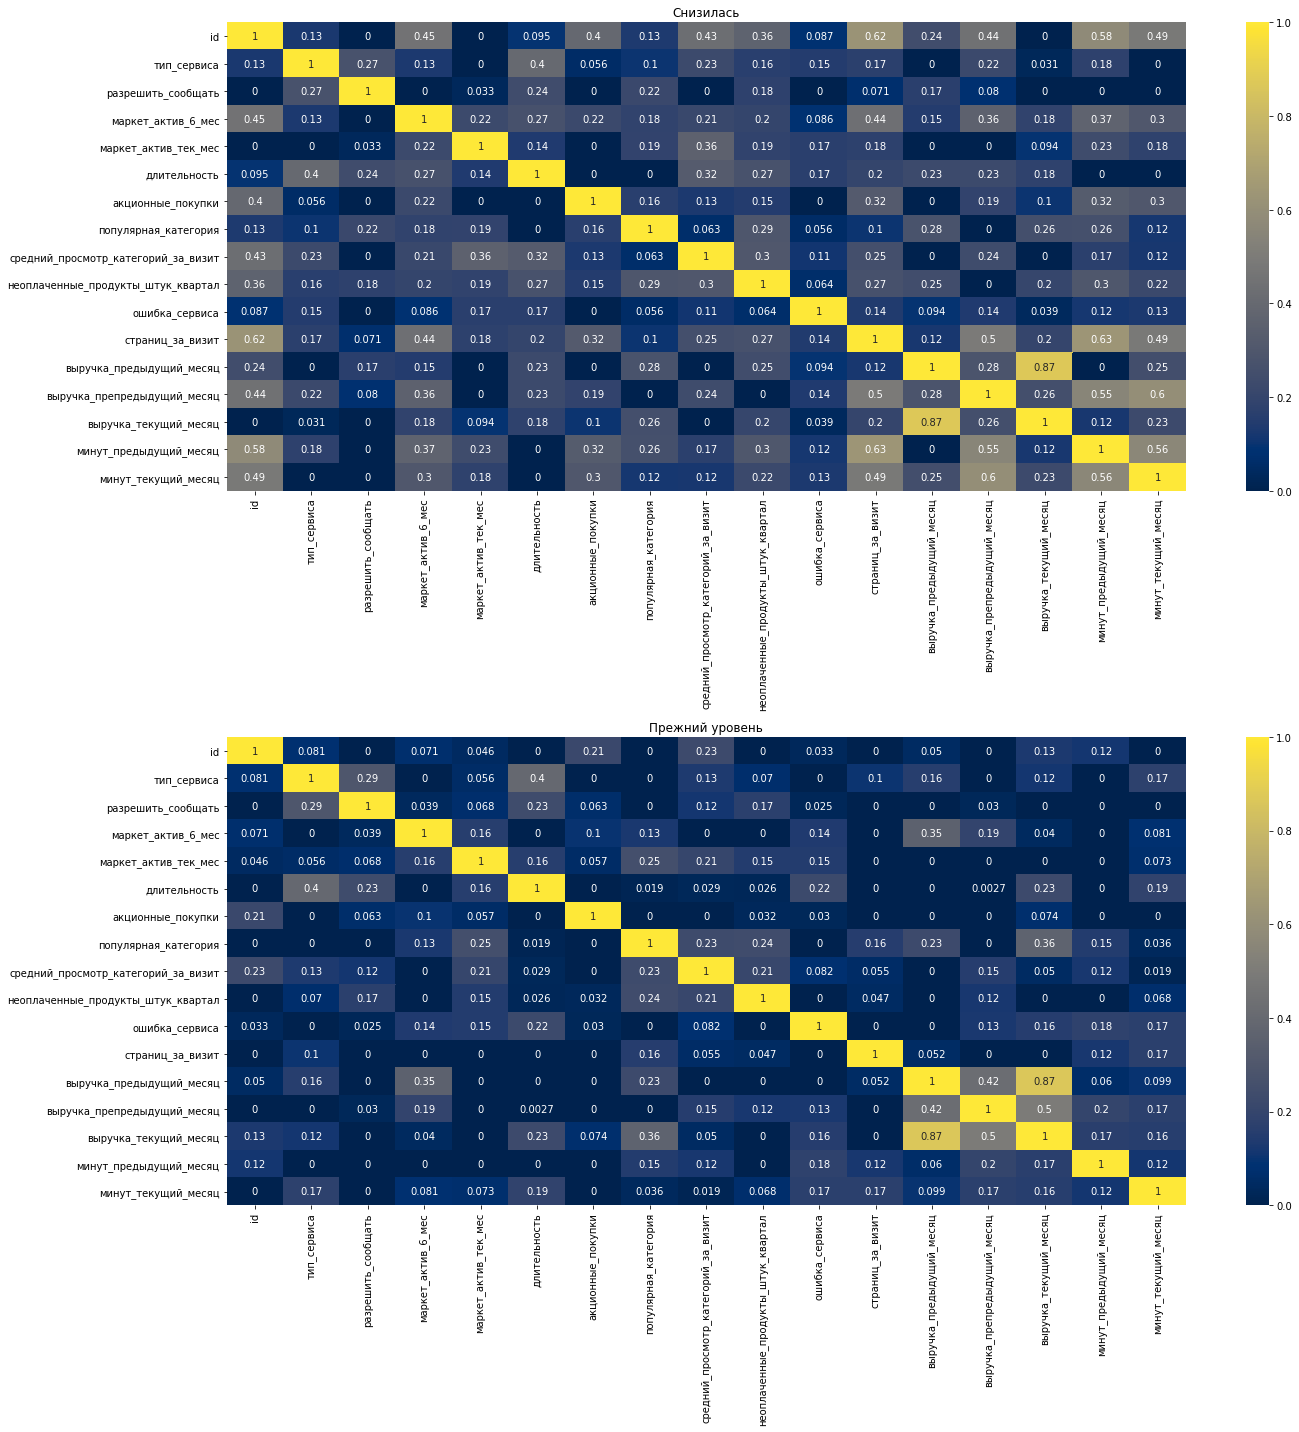

In [55]:
build_phik_corr_matrix(df_full, 'покупательская_активность')

Целевым признаком является Покупательская_активность. Она имеет корреляцию с ним: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка, Длительность, Ошибка_сервиса.


Среди признаков замечана более менее сильная корреляция Выручка. Но значение корреляции меньше 0.9 поэтому не будем удалять признаки.
Так же график показывает странную корреляцию между Покупательская_активность и id, так что id уберем из датасета и так как он нам еще понадобиться то превратим его в индекс датасета.

### Использование пайплайнов

Обучу модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC() используя пайплайны.

Закодируем целевой признак в значение 0 и 1. А так же колонку акционные_покупки преобразую в категоральный признак.

In [56]:
df_full.head(2)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13


In [57]:
df_full['покупательская_активность'] = df_full['покупательская_активность']\
.apply( lambda x: 1 if x=='Снизилась' else 0 )
df_full['покупательская_активность'] = df_full['покупательская_активность'].astype(int)    

In [58]:
# Проверка наличия столбца
print("Список столбцов:", df_full.columns)


Список столбцов: Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц'],
      dtype='object')


In [59]:
df_full['акционные_покупки_категория'] = df_full['акционные_покупки']\
.apply( lambda x: 'Часто покупает по акции' if x>= 0.5 else 'Редко покупает по акции' )
df_full = df_full.drop(['акционные_покупки'], axis=1)

In [60]:
df_full = df_full.set_index('id')

In [61]:
df_full.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
id,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,Часто покупает по акции
215350,1,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,Редко покупает по акции
215351,1,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,Часто покупает по акции
215352,1,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,Часто покупает по акции
215353,1,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,Редко покупает по акции


In [62]:
X = df_full.drop(['покупательская_активность'], axis=1)
y = df_full['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [63]:
X_train.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
id,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,Редко покупает по акции
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,Редко покупает по акции
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,Редко покупает по акции
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,Часто покупает по акции
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,Редко покупает по акции


In [64]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные_покупки_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минут_предыдущий_месяц', 'минут_текущий_месяц'] 

In [65]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='error', sparse=False, drop='first'))
    ]
)

In [66]:
ord_pipe = Pipeline([
    ('simple_imputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['Редко покупает по акции', 'Часто покупает по акции']],
                          handle_unknown='use_encoded_value', unknown_value=-1)),
    ('simple_imputer_ord_after', SimpleImputer(missing_values=-1, strategy='most_frequent'))
])


In [67]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [68]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [69]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=42, kernel='poly', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [70]:
print('Columns in X_train:',X_train.columns)

Columns in X_train: Index(['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
       'маркет_актив_тек_мес', 'длительность', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц',
       'акционные_покупки_категория'],
      dtype='object')


In [71]:
print("Pipeline steps:", pipe_final.named_steps)

Pipeline steps: {'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['разрешить_сообщать', 'популярная_категория',
                                  'тип_сервиса']),
                                ('ord',
                                 Pipeline(steps=[('simple_imputer_ord_before',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('or...
                                 ['акционные_покупки_категория']),
                                ('num'

In [72]:
#выберу лучшую модель 
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                          

In [73]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория',
                                                   'тип_сервиса']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imput

In [74]:
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_))

Метрика лучшей модели на тренировочной выборке: 1


In [75]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.92


- Вывод.

В ходе исследования мной была найдена и обучена модель для определения снижения активности покупателей сервиса. Лучший результат показала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'). Метрика roc_auc для тестовой выборки показла результат 0,92, а на тренировочной 1. Показатели метрик очень хорошие и модель прекрасно справляется с предсказанием.
И несмотря на дисбаланс в классах и все же он не помешал на получить такие высокие метрики.

Метрика ROC-AUC является одной из наиболее широко используемых метрик для оценки качества бинарных классификаторов? так как у нее есть: 
 - Независимость от порога отсечения. ROC-AUC оценивает модель по всем возможным порогам классификации. Это позволяет получить более объективную оценку качества модели, так как она не зависит от конкретного значения порога, которое может быть выбрано для разделения классов.

 - Чувствительность и специфичность. ROC-кривая отображает баланс между чувствительностью (True Positive Rate, TPR) и специфичностью (1 - False Positive Rate, FPR). Это позволяет визуально оценить, как модель справляется с различными типами ошибок.

 - Устойчивость к дисбалансу классов. ROC-AUC хорошо подходит для задач с несбалансированными данными, поскольку оценивает ранжирование вероятностей, а не абсолютные значения. В отличие от accuracy, которая может быть завышена на несбалансированных данных, ROC-AUC остается объективной метрикой.
 
 - Интерпретация. Значение ROC-AUC может быть интерпретировано как вероятность того, что случайно выбранный положительный пример будет иметь более высокую оценку предсказанной вероятности, чем случайно выбранный отрицательный пример. Значение ROC-AUC от 0.5 до 1 указывает на степень, в которой модель лучше случайного угадывания.

### Анализ важности признаков

- Оценю важность признаков для лучшей модели и построю график важности с помощью метода SHAP. 

- Сделаю выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [76]:
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

In [77]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [78]:
# Преобразование обучающих данных
X_train_2 = preprocessor.transform(X_train)
# Преобразование тестовых данных
X_test_2 = preprocessor.transform(X_test)

In [79]:
X_train.shape

(972, 16)

In [80]:
X_test.shape

(324, 16)

In [81]:
# Получение имен признаков
feature_names = ['ohe__разрешить_сообщать_нет',
       'ohe__популярная_категория_Косметика и аксесуары',
       'ohe__популярная_категория_Кухонная посуда',
       'ohe__популярная_категория_Мелкая бытовая техника и электроника',
       'ohe__популярная_категория_Техника для красоты и здоровья',
       'ohe__популярная_категория_Товары для детей',
       'ohe__тип_сервиса_стандарт', 'ord__акционные_покупки_категория',
       'num__маркет_актив_6_мес', 'num__маркет_актив_тек_мес',
       'num__длительность', 'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__выручка_предыдущий_месяц',
       'num__выручка_препредыдущий_месяц', 'num__выручка_текущий_месяц',
       'num__минут_предыдущий_месяц', 'num__минут_текущий_месяц']
# Преобразование тестовых данных в DataFrame
X_test_2 = pd.DataFrame(X_test_2, columns= feature_names)

In [82]:
# Использование случайной подвыборки данных для KernelExplainer
background = shap.utils.sample(X_train_2, 100)  # можно использовать меньше или больше данных

In [83]:
# Создание KernelExplainer
explainer = shap.KernelExplainer(best_model.predict, X_test_2)

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [84]:
# Получение значений SHAP для тестовых данных
shap_values = explainer.shap_values(X_test_2)


  0%|          | 0/324 [00:00<?, ?it/s]

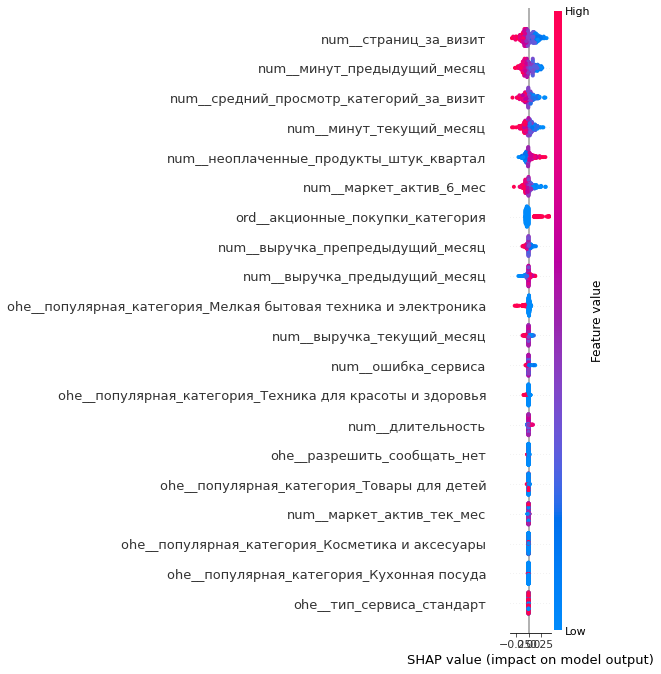

In [85]:
# Визуализация значений SHAP
shap.summary_plot(shap_values, X_test_2, feature_names)

Пять самых важных для модели признаков это: cтраниц_за_визит, мин_предыдущий_месяц, cредний_просмотр_категорий_за_визит, мин_текущий_месяц, неоплаченный_продукты_штук_квартал. Скорей всего объясняется тем, что чем больше пролистывает страниц, тем больше вероятность того, что он найдет нужный товар. Кроме того при поиске той самой модели продукта постоянно пользователь может добавлять в корзину схожие товары, но  и в итоге купить только что-то одно.


Малозначимыми признаками оказались: популярная категория_косметика и аксесуары, популярная_категория_Кухонная посуда, Тип_сервиса_стандарт, популярная_категория_Товары для детей, маркет_актив_тек_мес, разрешить сообщать и длительность, популярная_категория_Техника для красоты и здоровья, ошибка сервиса. Тут можно согласиться с решениями модели, тк мы рассматриваем только активных покупателей, то нам не важны длительность или ошибка сервиса. 

### Сегментация покупателей

-  Выполню сегментацию покупателей, используя результаты моделирования и данные о прибыльности покупателей.

- Выберу группу покупателей и предложу, как увеличить её покупательскую активность. Проведите графическое и аналитическое исследование группы покупателей.

- Сделаю выводы о сегментах: какой сегмент взят для дополнительного исследования, какие предложения сделаны и почему.

In [86]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [87]:
X_test.head(3)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
id,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,Редко покупает по акции
215654,премиум,нет,1.4,4,684,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,Часто покупает по акции
216307,премиум,да,3.3,4,488,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,Редко покупает по акции


In [88]:
X_test_full = X_test.copy()
X_train_full = X_train.copy()
X_test_full['вероятность_снижения'] = y_test_proba
X_train_full['вероятность_снижения'] = y_train_proba
df_full = pd.concat([X_train_full, X_test_full])


In [89]:
money = money_df.set_index('id')
df_full = df_full.join(money)

In [90]:
# Определение условия
condition = (df_full['прибыль'] > 3) & (df_full['вероятность_снижения'] < 0.2)

# Разделение данных на два сегмента
df_segment = df_full[condition]
df_other_segments = df_full[~condition]


In [91]:
X_test_full = X_test.copy()
X_train_full = X_train.copy()
X_test_full['вероятность_снижения'] = y_test_proba
X_train_full['вероятность_снижения'] = y_train_proba
df_full = pd.concat([X_train_full, X_test_full])

money = money_df.set_index('id')
df_full = df_full.join(money)

In [92]:
df_full.head(3)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,Редко покупает по акции,0.066277,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,Редко покупает по акции,0.781146,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,Редко покупает по акции,0.083993,4.37


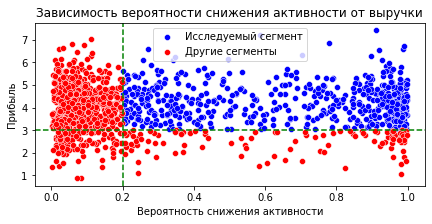

In [93]:
plt.figure(figsize=(7,3))

cond = (df_full['прибыль'] > 3) & (df_full['вероятность_снижения'] > 0.2)
seg_1 = df_full[cond]
seg_2 = df_full[~cond]

sns.scatterplot(data=seg_1, y='прибыль', x='вероятность_снижения', label='Исследуемый сегмент', color='blue')
sns.scatterplot(data=seg_2, y='прибыль', x='вероятность_снижения', label='Другие сегменты', color='red')

plt.legend() 

plt.axvline(x=0.2, color='green', linestyle='--')
plt.axhline(y=3, color='green', linestyle='--') 

plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

На графике показанно, что зависимости вероятности снижения активности пользователя от прибыли нет.
Построю подобную диаграмму с категориальными признаками 

In [94]:
def build_scatterplots(cat_columns):
    for cat_col in cat_columns:
        fig = plt.figure(figsize=(10,8))
        sns.scatterplot(data=df_full, y='прибыль', x='вероятность_снижения', hue=cat_col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('Зависимость вероятности снижения активности от выручки')
        plt.show()

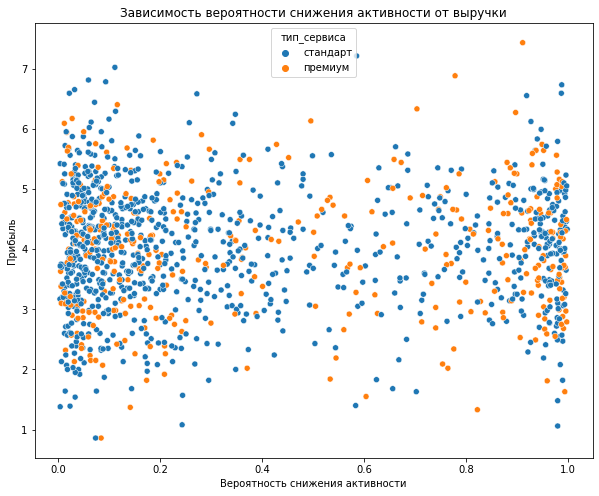

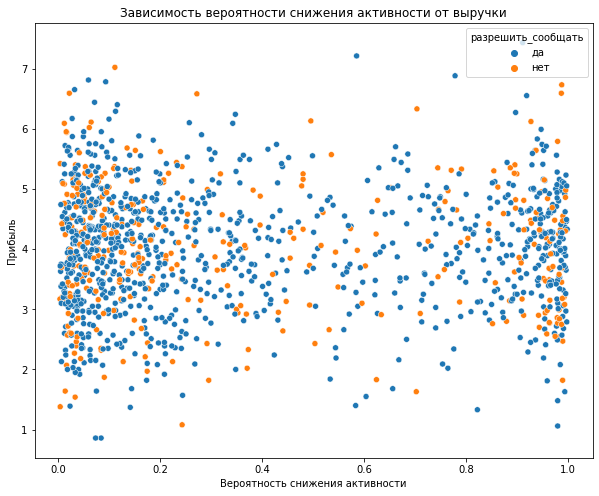

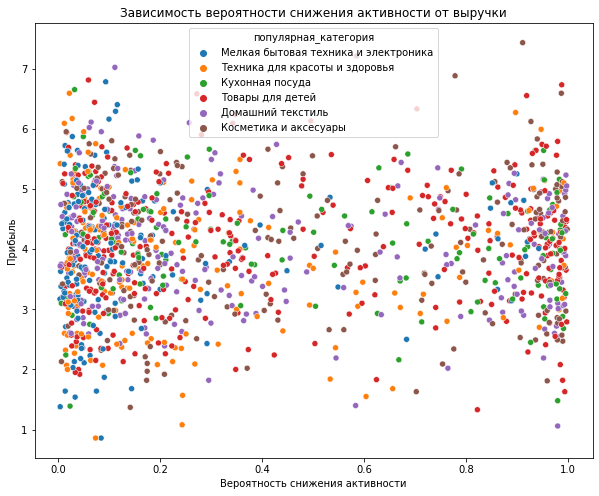

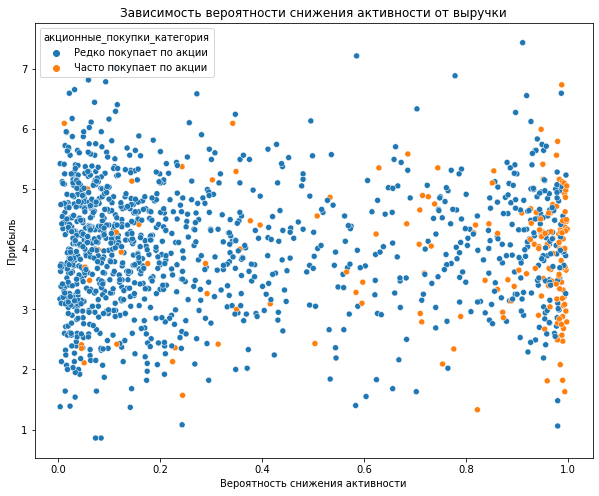

In [95]:
cat_columns = list(df_full.select_dtypes(include='object').columns)
build_scatterplots(cat_columns)

На графике распределение Акционные_покупки_категория бросается в глаза, тк пользователи, которые часто покупают по скидке чаще всего имеют высокую вероятность снижения активности. Тк, скидки не постоянно бывают, значит и покупки этот сегмент пользователей совершает редко, либо сезонно. 

Попробуем проанализировать этот сегмент. Для этого добавлю колонку и в ней обозначу пользователей, которые часто покупают по акции и вероятность снижения их активности может составить 80% и более.

In [96]:
df_full['сегмент'] = df_full\
.apply( lambda row: 'Исследуемый сегмент' \
        if row['вероятность_снижения'] > 0.8 and row['акционные_покупки_категория']=='Часто покупает по акции' \
        else 'Остальные пользователи' \
      , axis=1)

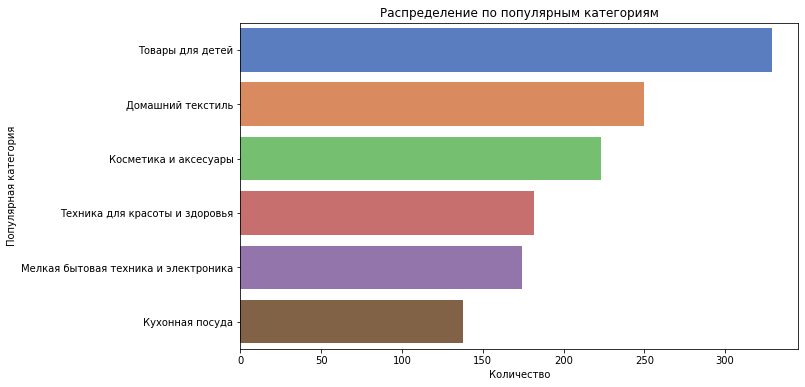

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full, y='популярная_категория', palette='muted', order=df_full['популярная_категория'].value_counts().index)

plt.xlabel('Количество')
plt.ylabel('Популярная категория')
plt.title('Распределение по популярным категориям')

plt.show()

Неожиданный результат, тк обычно товары для детей это расходники, ведь если есть ребенок, то траты постоянны.

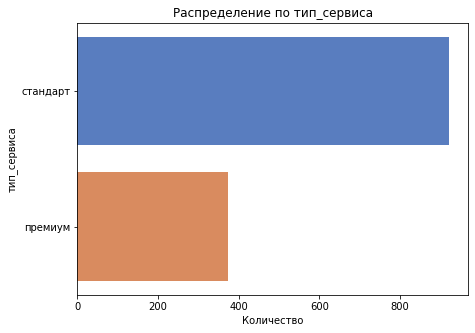

In [98]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_full, y='тип_сервиса', palette='muted', order=df_full['тип_сервиса'].value_counts().index)

plt.xlabel('Количество')
plt.ylabel('тип_сервиса')
plt.title('Распределение по тип_сервиса')

plt.show()

Странно получается, покупатель приобретает товар в основном по скидке, но в то же время покупает премиум. Что-то не сходится. А ещё, если сравнить распределения со всем массивом пользователей, но различие небольшое

In [99]:
def histogram(df, numerical_col, categorical_col):
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df, x=numerical_col, hue=categorical_col, multiple="stack", palette="muted", bins=30)
    
    plt.xlabel(numerical_col)
    plt.ylabel('Количество')
    plt.title(f'Гистограмма {numerical_col} с разделением по {categorical_col}')
    plt.legend(title=categorical_col)
    plt.show()

No handles with labels found to put in legend.


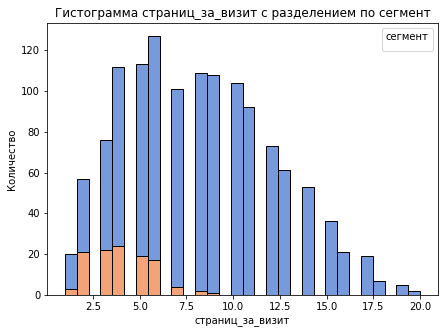

In [100]:
histogram(df_full, 'страниц_за_визит', 'сегмент')

по графику видно, что пользователи по скидке просматривают меньше страниц. выглядит так, будто пользователи не ищут и выбирают, а покупают целенаправленно.

No handles with labels found to put in legend.


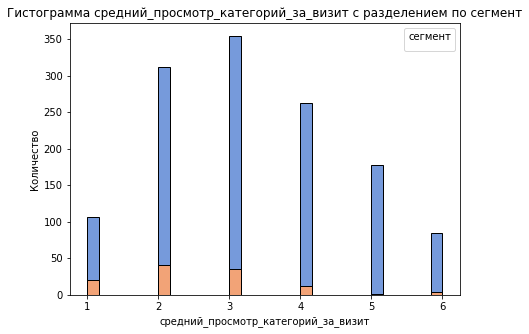

In [101]:
histogram(df_full, 'средний_просмотр_категорий_за_визит', 'сегмент')

Среднее количество просматриваемых категорий не различается.

No handles with labels found to put in legend.


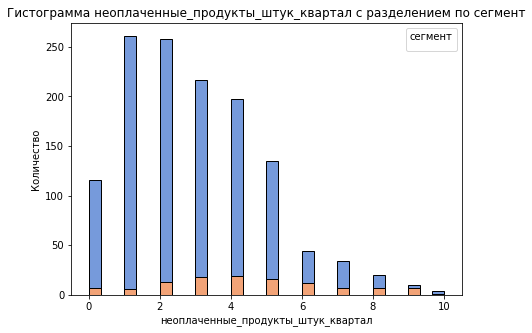

In [102]:
histogram(df_full, 'неоплаченные_продукты_штук_квартал', 'сегмент')

получается, что пользователи из исследуемого сегмента в среднем оставляют неоплаченными в корзине больше товаров.

Теперь сравню количество маркетинговых коммуникаций у покупателей по акции и всего массива пользователей.

No handles with labels found to put in legend.


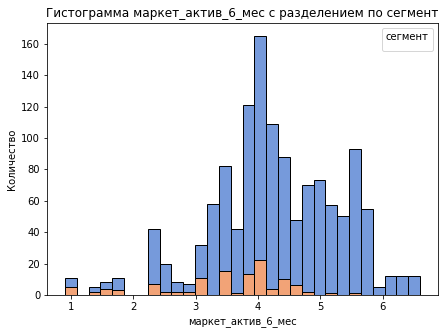

In [103]:
histogram(df_full, 'маркет_актив_6_мес', 'сегмент')

No handles with labels found to put in legend.


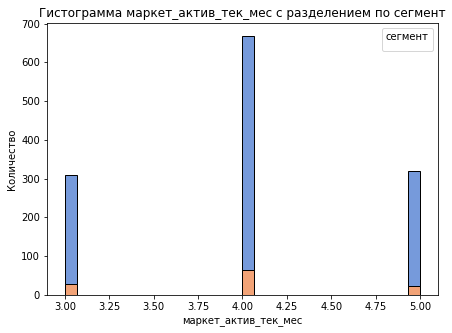

In [104]:
histogram(df_full, 'маркет_актив_тек_мес', 'сегмент')

Покупатели по акции получали такое же количество внимания от маркетплейса как и другие пользователи. Это значит, что магазин не информирует их как то дополнительно о скидках. Информация о скидках доступна всем в равной мере.

Также, проанализоровав видно, что некоторые признаки сегмента пользователей покупают по скидке и имеют высокую вероятность снижения покупательской активности.

Пользователи, которые проводят не так много времени на сайте не сравнивают товары, не выбирают лучший, они просмотривают один-два товара и покупают.

Вот мое предлоежние для того, чтобы этот сегмент покупал больше, а значит приносил больше прибыли. 
Можно минимизировать траты или вовсе сократь на рассылки. Так как вряд ли, если человек просматривает малое количнсво страниц с товарами, будет просматривать рекламные материалы.

Так же, нужно сделать фокус больше на конкретных покупателей , соответсвенно таргеторивать страницу соответасвующим образом. 

И последнее, на главной странице можно всегда отображать скидки, чтоб покупателеям было проще.


### Общий вывод

Задачей данного иссследования было построение модели, которая бы предсказала уменьшение покупательской активности пользователей интернет-магазина "В один клик".
Другой задачей было исследование выбранного сегмента пользователей.

В рамках исследования были проделаны следующие шаги.

- Загрузка данных

Исходными данными для исследования были четыре отдельных csv файла:

1) с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
2) с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом
3) с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
4) с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю

Данные были загружены в датафреймы библиотеки pandas.

- Предобработка данных

Исходные данные были хорошего качества, но тем не менее они требовали проведения некоторых работ перед началом анализа.

А) В столбце 'Тип сервиса' были обнаружены и устранены неявные дубликаты;
Б) тип данных столбца 'Прибыль' датафрейма money_data был изменен на float;
В) все датафреймы были проверены на наличие пропусков, явных и неявных дубликатов;
Г) после небольших корректировок замечаний в данным всех датафреймов нет.

- Исследовательский анализ данных

На этом этапе были построены диаграммы распределения всех признаков. С помощью графиков были обнаружены и исправлены опечатки в категоральных признаках. Ещё добавлю, что график распределения признака Акционные_покупки явно выделял две группы пользователей поэтому признак был превращен в категориальный.

- Корреляционный анализ данных

Целевым признаком является Покупательская_активность. Она имеет корреляцию с ни: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка, Длительность, Ошибка_сервиса.


Среди признаков замечана более менее сильная корреляция Выручка. Но значение корреляции меньше 0.9 поэтому не будем удалять признаки.
Так же график показывает странную корреляцию между Покупательская_активность и id, так что id уберем из датасета и так как он нам еще понадобиться то превратим его в индекс датасета.

- Объеденение таблиц

Датасеты market_file, market_money, market_time были объеденены в один датафрейм.

- Обучение модели

В ходе исследования мной была найдена и обучена модель для определения снижения активности покупателей сервиса. Лучший результат показала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'). Метрика roc_auc для тестовой выборки показла результат 0,92, а на тренировочной 1. Показатели метрик очень хорошие и модель прекрасно справляется с предсказанием. И несмотря на дисбаланс в классах и все же он не помешал на получить такие высокие метрики.

- Анализ важности признаков

Пять самых важных для модели признаков это: cтраниц_за_визит, мин_предыдущий_месяц, cредний_просмотр_категорий_за_визит, мин_текущий_месяц, неоплаченный_продукты_штук_квартал. Скорей всего объясняется тем, что чем больше пролистывает страниц, тем больше вероятность того, что он найдет нужный товар. Кроме того при поиске той самой модели продукта постоянно пользователь может добавлять в корзину схожие товары, но и в итоге купить только что-то одно.

Малозначимыми признаками оказались: популярная категория_косметика и аксесуары, популярная_категория_Кухонная посуда, Тип_сервиса_стандарт, популярная_категория_Товары для детей, маркет_актив_тек_мес, разрешить сообщать и длительность, популярная_категория_Техника для красоты и здоровья, ошибка сервиса. Тут можно согласиться с решениями модели, тк мы рассматриваем только активных покупателей, то нам не важны длительность или ошибка сервиса.

- Сегментация пользователей

Покупатели по акции получали такое же количество внимания от маркетплейса как и другие пользователи. Это значит, что магазин не информирует их как то дополнительно о скидках. Информация о скидках доступна всем в равной мере.

Также, проанализоровав видно, что некоторые признаки сегмента пользователей покупают по скидке и имеют высокую вероятность снижения покупательской активности.

Пользователи, которые проводят не так много времени на сайте не сравнивают товары, не выбирают лучший, они просмотривают один-два товара и покупают.

Вот мое предлоежние для того, чтобы этот сегмент покупал больше, а значит приносил больше прибыли. Можно минимизировать траты или вовсе сократь на рассылки. Так как вряд ли, если человек просматривает малое количнсво страниц с товарами, будет просматривать рекламные материалы.

Так же, нужно сделать фокус больше на конкретных покупателей , соответсвенно таргеторивать страницу соответасвующим образом.

И последнее, на главной странице можно всегда отображать скидки, чтоб покупателеям было проще.